In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the uploaded file (now in your working directory)
df = pd.read_csv('PLTable.csv')
df.head()

,season_end_year,team,position,played,won,drawn,lost,gf,ga,gd,points,notes
0,1993,Manchester Utd,1,42,24,12,6,67,31,36,84,→ Champions League via league finish
1,1993,Aston Villa,2,42,21,11,10,57,40,17,74,→ UEFA Cup via league finish
2,1993,Norwich City,3,42,21,9,12,61,65,-4,72,→ UEFA Cup via league finish 1
3,1993,Blackburn,4,42,20,11,11,68,46,22,71,NaN
4,1993,QPR,5,42,17,12,13,63,55,8,63,NaN


In [ ]:
#1 Training Script

In [38]:
# train_model.py

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib

# Load dataset
df = pd.read_csv('PLTable.csv')

# Select features and target
X = df[['gf', 'ga', 'gd']]  # Features: Goals For, Against, and Goal Difference
y = df['points']            # Target: Points

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Save trained model
joblib.dump(model, 'trained_model.pkl')
print("Model trained and saved to 'trained_model.pkl'")


Model trained and saved to 'trained_model.pkl'


In [ ]:
#2 Testing Script

In [39]:
import pandas as pd
import joblib

# Load dataset
df = pd.read_csv('PLTable.csv')
X = df[['gf', 'ga', 'gd']]

# Load trained model
model = joblib.load('trained_model.pkl')

# Make predictions
predictions = model.predict(X)

# Display a few predictions
print("Sample predictions:", predictions[:5])


Sample predictions: [74.87956486 62.92101248 50.83196521 66.69527168 58.06123651]


In [ ]:
#3 Evaluation Script

In [51]:
# evaluate_model.py

import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error

# Load data and model
df = pd.read_csv('PLTable.csv')
X = df[['gf', 'ga', 'gd']]
y = df['points']
model = joblib.load('trained_model.pkl')

# Predict on entire dataset
y_pred = model.predict(X)

# Compute evaluation metrics
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print(f"R² score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")


R² score: 0.9194
Mean Squared Error: 21.91
Root Mean Squared Error: 4.68


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646 entries, 0 to 645
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   season_end_year  646 non-null    int64 
 1   team             646 non-null    object
 2   position         646 non-null    int64 
 3   played           646 non-null    int64 
 4   won              646 non-null    int64 
 5   drawn            646 non-null    int64 
 6   lost             646 non-null    int64 
 7   gf               646 non-null    int64 
 8   ga               646 non-null    int64 
 9   gd               646 non-null    int64 
 10  points           646 non-null    int64 
 11  notes            326 non-null    object
dtypes: int64(10), object(2)
memory usage: 60.7+ KB
None
Contents of Premier League dataset:
   season_end_year            team  position  played  won  drawn  lost  gf  \
0             1993  Manchester Utd         1      42   24     12     6  6

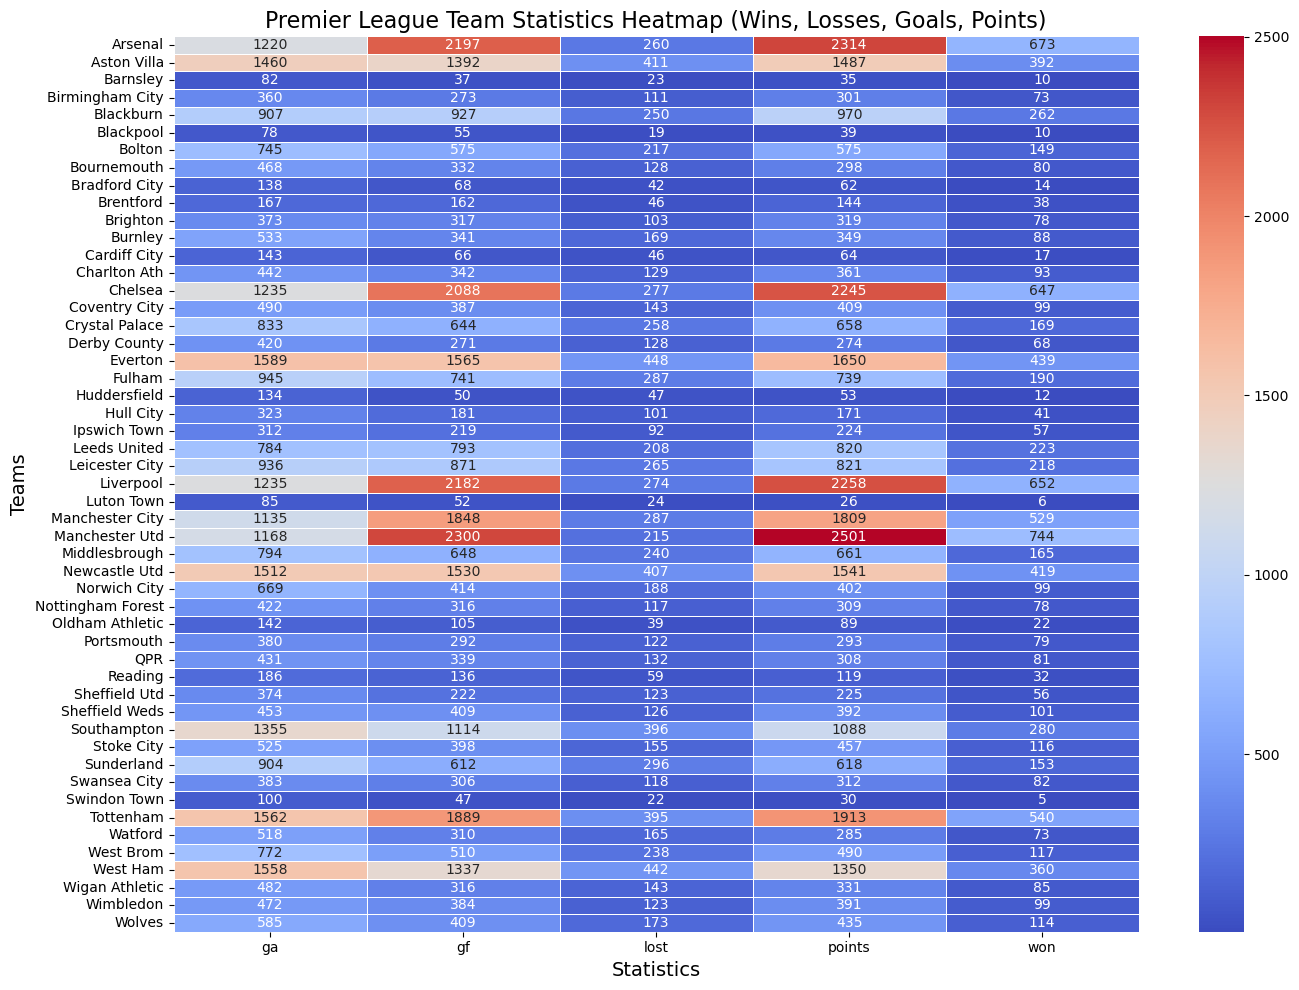

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the path to the CSV file
csv_file = r"PLTable.csv"

try:
    # Load the CSV file into a DataFrame
    pl_data = pd.read_csv(csv_file)
    
    print("Dataset Information:")
    print(pl_data.info())
    
    # Display the first few rows of the DataFrame
    print("Contents of Premier League dataset:")
    print(pl_data.head())
    
    # Create a pivot table with teams as rows and relevant stats (won, lost, gf, ga, points) as columns
    team_stats = pl_data.pivot_table(
        index='team',  # Rows for each team
        values=['won', 'lost', 'gf', 'ga', 'points'],  # Columns with statistical data
        aggfunc='sum',  # Sum for each team over all seasons
        fill_value=0  # Fill NaN with 0 if any team has missing values for certain stats
    )
    
    # Display the team statistics to verify data
    print("Team statistics:")
    print(team_stats)
    
    # Create a heatmap to visualize the team statistics
    plt.figure(figsize=(14, 10))  # Increase size for better readability
    sns.heatmap(team_stats, annot=True, cmap='coolwarm', fmt='d', linewidths=0.5)
    
    # Adding titles and labels
    plt.title('Premier League Team Statistics Heatmap (Wins, Losses, Goals, Points)', fontsize=16)
    plt.xlabel('Statistics', fontsize=14)
    plt.ylabel('Teams', fontsize=14)
    
    # Display the heatmap
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646 entries, 0 to 645
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   season_end_year  646 non-null    int64 
 1   team             646 non-null    object
 2   position         646 non-null    int64 
 3   played           646 non-null    int64 
 4   won              646 non-null    int64 
 5   drawn            646 non-null    int64 
 6   lost             646 non-null    int64 
 7   gf               646 non-null    int64 
 8   ga               646 non-null    int64 
 9   gd               646 non-null    int64 
 10  points           646 non-null    int64 
 11  notes            326 non-null    object
dtypes: int64(10), object(2)
memory usage: 60.7+ KB
None
Contents of the Premier League dataset:
   season_end_year            team  position  played  won  drawn  lost  gf  \
0             1993  Manchester Utd         1      42   24  

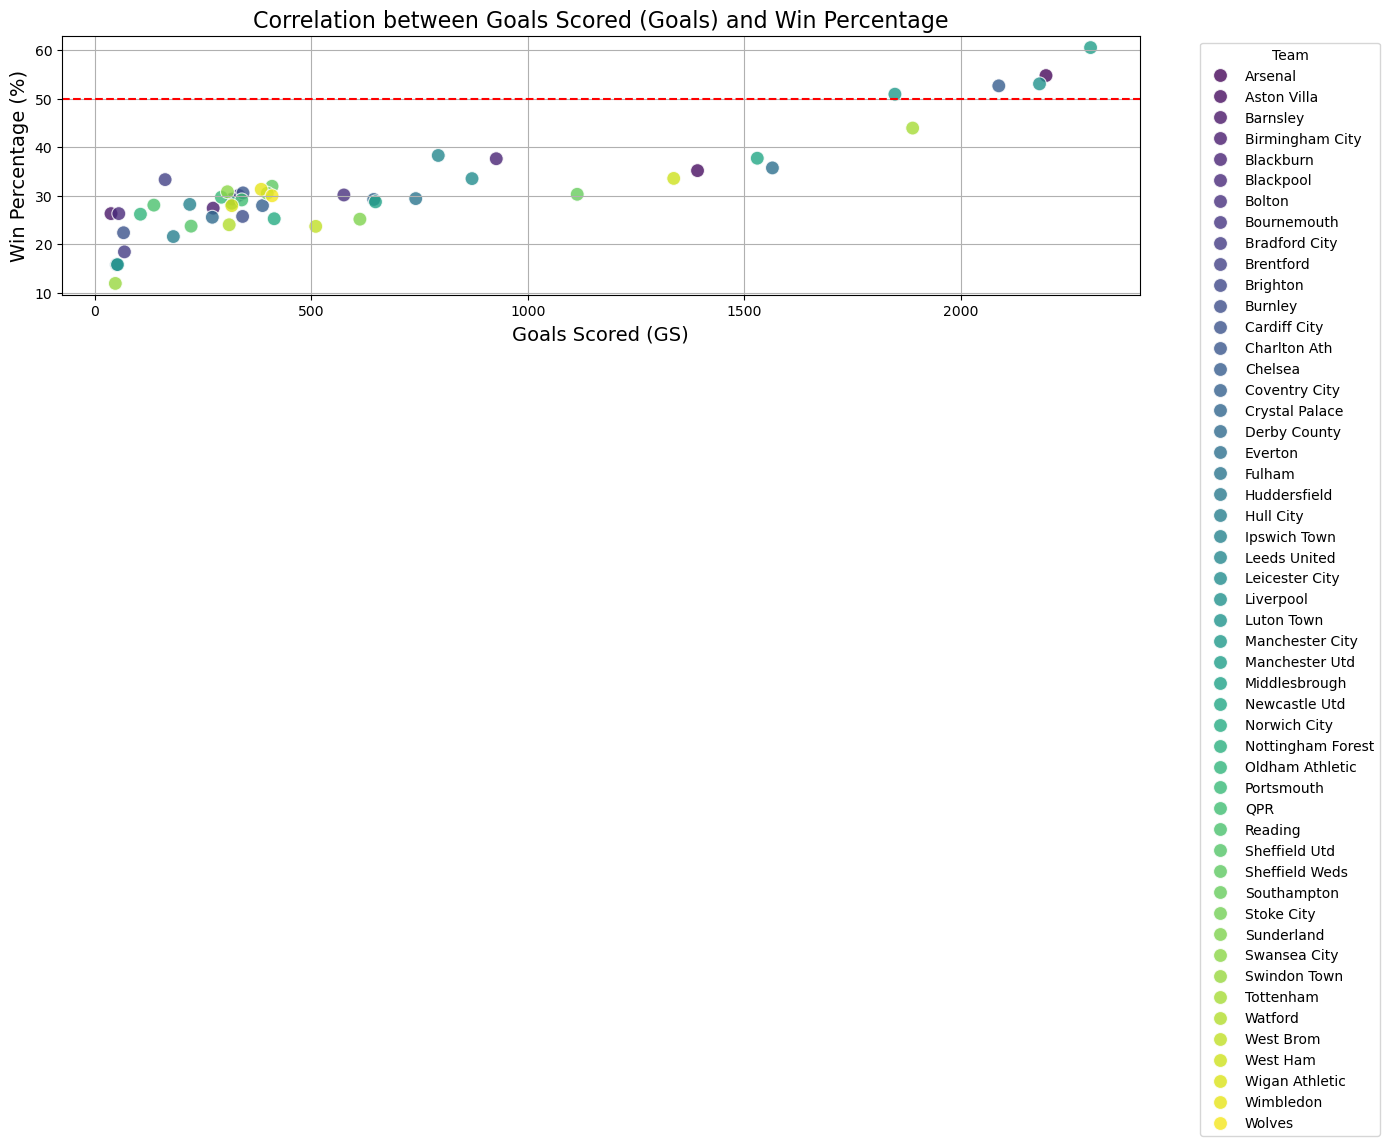

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the path to the CSV file
csv_file = r"PLTable.csv"  # Adjust the path if necessary

# Load the CSV file into a DataFrame
try:
    pl_data = pd.read_csv(csv_file)
    
    # Display the DataFrame information
    print("Information about the dataset:")
    print(pl_data.info())
    
    # Display the first few rows of the DataFrame
    print("Contents of the Premier League dataset:")
    print(pl_data.head())

    # Group by team and calculate total wins, matches played, and goals scored (gf)
    team_stats = pl_data.groupby('team').agg({
        'won': 'sum', 
        'played': 'sum', 
        'gf': 'sum'  # Using 'gf' for goals scored
    }).reset_index()

    # Calculate win percentage
    team_stats['win_percentage'] = (team_stats['won'] / team_stats['played']) * 100

    # Display the team statistics with win percentage and goals scored
    print("Team statistics with win percentage and goals scored:")
    print(team_stats)

    # Plotting the correlation between goals scored and win percentage
    plt.figure(figsize=(14, 8))  # Increased figure size
    scatter = sns.scatterplot(data=team_stats, x='gf', y='win_percentage', hue='team', palette='viridis', s=100, alpha=0.8)

    # Adding a legend outside of the plot
    plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position

    plt.title('Correlation between Goals Scored (Goals) and Win Percentage', fontsize=16)
    plt.xlabel('Goals Scored (GS)', fontsize=14)
    plt.ylabel('Win Percentage (%)', fontsize=14)
    plt.axhline(y=50, color='red', linestyle='--', label='50% Win Rate')  # Optional: Line for 50% win rate
    plt.grid(True)
    plt.tight_layout()  # Adjust layout to make room for the legend
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646 entries, 0 to 645
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   season_end_year  646 non-null    int64 
 1   team             646 non-null    object
 2   position         646 non-null    int64 
 3   played           646 non-null    int64 
 4   won              646 non-null    int64 
 5   drawn            646 non-null    int64 
 6   lost             646 non-null    int64 
 7   gf               646 non-null    int64 
 8   ga               646 non-null    int64 
 9   gd               646 non-null    int64 
 10  points           646 non-null    int64 
 11  notes            326 non-null    object
dtypes: int64(10), object(2)
memory usage: 60.7+ KB
None
Contents of the Premier League dataset:
   season_end_year            team  position  played  won  drawn  lost  gf  \
0             1993  Manchester Utd         1      42   24  

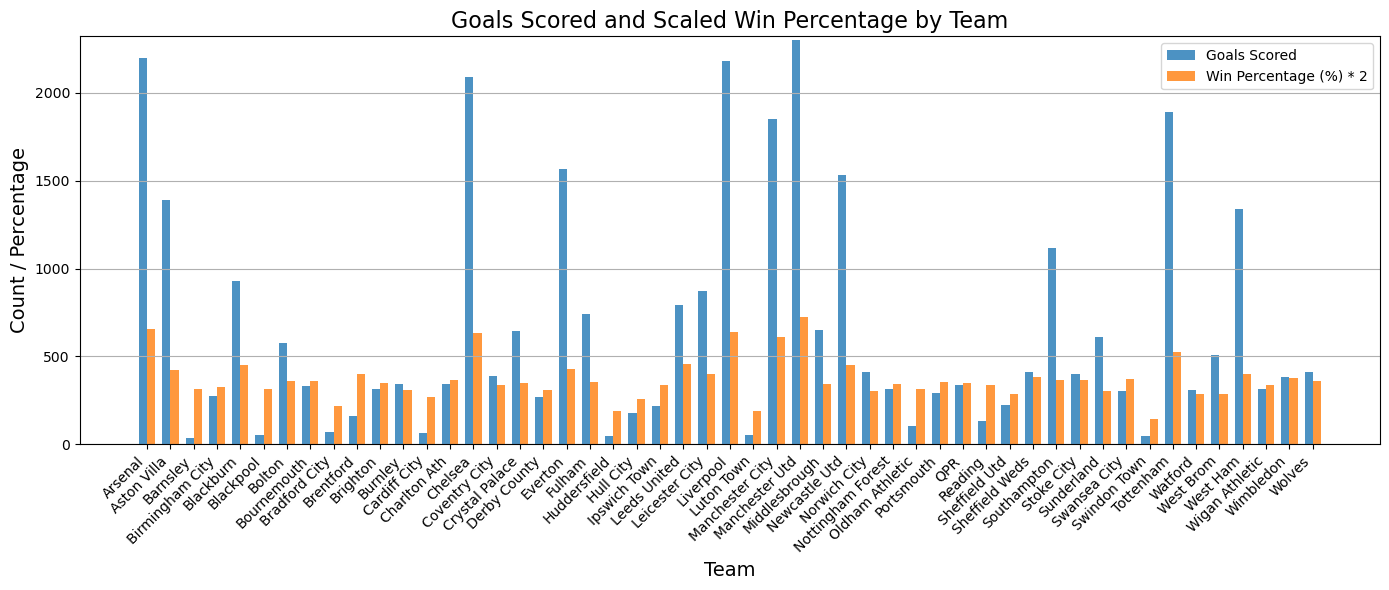

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the path to the CSV file
csv_file = r"PLTable.csv"  # Adjust the path if necessary

# Load the CSV file into a DataFrame
try:
    pl_data = pd.read_csv(csv_file)
    
    # Display the DataFrame information
    print("Information about the dataset:")
    print(pl_data.info())
    
    # Display the first few rows of the DataFrame
    print("Contents of the Premier League dataset:")
    print(pl_data.head())

    # Group by team and calculate total wins, matches played, and goals scored (gf)
    team_stats = pl_data.groupby('team').agg({
        'won': 'sum', 
        'played': 'sum', 
        'gf': 'sum'  # Using 'gf' for goals scored
    }).reset_index()

    # Calculate win percentage
    team_stats['win_percentage'] = (team_stats['won'] / team_stats['played']) * 100

    # Scale the win percentage for better visual comparison
    scale_factor = 12  # You can adjust this factor
    team_stats['scaled_win_percentage'] = team_stats['win_percentage'] * scale_factor

    # Display the team statistics with win percentage and goals scored
    print("Team statistics with win percentage and goals scored:")
    print(team_stats)

    # Set the figure size
    plt.figure(figsize=(14, 6))

    # Create a bar plot for Goals Scored and Scaled Win Percentage
    bar_width = 0.35
    index = range(len(team_stats))

    # Create bars for Goals Scored
    plt.bar(index, team_stats['gf'], bar_width, label='Goals Scored', alpha=0.8)

    # Create bars for Scaled Win Percentage
    plt.bar([i + bar_width for i in index], team_stats['scaled_win_percentage'], bar_width, label='Win Percentage (%) * 2', alpha=0.8)

    # Adding the titles and labels
    plt.title('Goals Scored and Scaled Win Percentage by Team', fontsize=16)
    plt.xlabel('Team', fontsize=14)
    plt.ylabel('Count / Percentage', fontsize=14)
    plt.xticks([i + bar_width / 2 for i in index], team_stats['team'], rotation=45, ha='right')  # Rotate team names for readability
    plt.legend()
    plt.grid(axis='y')  # Only show grid for the y-axis
    plt.tight_layout()  # Adjust layout to fit the labels

    # Set y-axis limits to provide more visual distinction
    plt.ylim(0, max(team_stats['gf'].max(), team_stats['scaled_win_percentage'].max()) + 20)

    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646 entries, 0 to 645
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   season_end_year  646 non-null    int64 
 1   team             646 non-null    object
 2   position         646 non-null    int64 
 3   played           646 non-null    int64 
 4   won              646 non-null    int64 
 5   drawn            646 non-null    int64 
 6   lost             646 non-null    int64 
 7   gf               646 non-null    int64 
 8   ga               646 non-null    int64 
 9   gd               646 non-null    int64 
 10  points           646 non-null    int64 
 11  notes            326 non-null    object
dtypes: int64(10), object(2)
memory usage: 60.7+ KB
None
Contents of Premier League dataset:
   season_end_year            team  position  played  won  drawn  lost  gf  \
0             1993  Manchester Utd         1      42   24     12     6  6

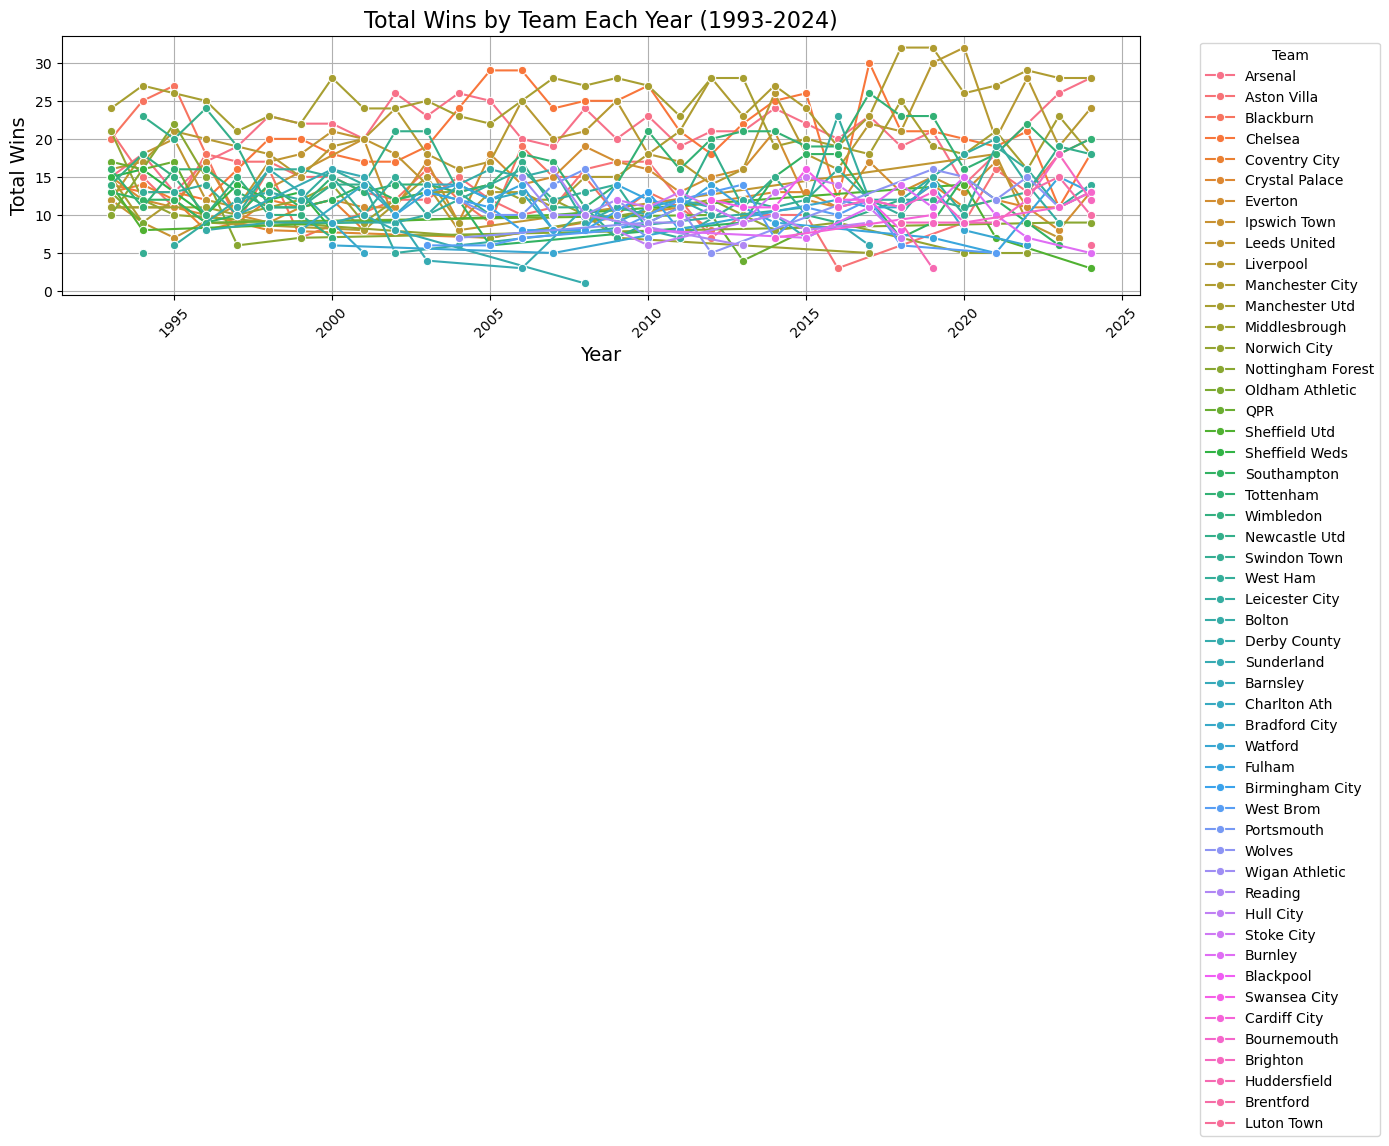

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the path to the CSV file
csv_file = r"PLTable.csv"

try:
    pl_data = pd.read_csv(csv_file)

    print("Dataset Information:")
    print(pl_data.info())
    
    # Display the first few rows of the DataFrame
    print("Contents of Premier League dataset:")
    print(pl_data.head())

    # Check for null values
    print("Null values in each column:")
    print(pl_data.isnull().sum())
    
    # Descriptive statistics for numerical columns
    print("Descriptive statistics:")
    print(pl_data.describe())

    # Group by 'season_end_year' and 'team' to calculate total wins per year
    team_wins_yearly = pl_data.groupby(['season_end_year', 'team'])['won'].sum().reset_index()

    # Display the aggregated team wins per year
    print("Total team wins each year:")
    print(team_wins_yearly.head())

    # Plotting total wins for each team over the years
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=team_wins_yearly, x='season_end_year', y='won', hue='team', marker='o')
    
    plt.title('Total Wins by Team Each Year (1993-2024)', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Total Wins', fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
    plt.grid(True)
    plt.tight_layout()  # Adjust layout to make room for the legend
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")

Intercept: -7.494278113333268
Slope: 0.8666907342205341


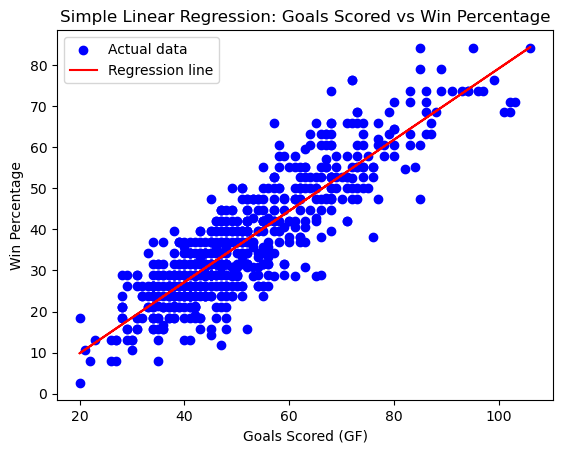

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
csv_file = r"PLTable.csv"
pl_data = pd.read_csv(csv_file)

# Example: Predicting 'win percentage' based on 'goals scored' (gf)

# Create the independent and dependent variables
X = pl_data['gf'].values  # Goals scored (independent variable)
y = (pl_data['won'] / pl_data['played']) * 100  # Win percentage (dependent variable)

# Add a bias term (intercept), X = [1, X]
X = np.c_[np.ones(X.shape[0]), X]

# Using the Normal Equation to calculate the coefficients (m, b)
theta = np.linalg.inv(X.T @ X) @ X.T @ y  # Normal equation: (X'X)^(-1) * X' * y

# The slope (m) and intercept (b)
intercept = theta[0]
slope = theta[1]

print(f"Intercept: {intercept}")
print(f"Slope: {slope}")

# Make predictions
y_pred = X @ theta

# Plot the regression line
plt.scatter(pl_data['gf'], y, color='blue', label='Actual data')
plt.plot(pl_data['gf'], y_pred, color='red', label='Regression line')
plt.title('Simple Linear Regression: Goals Scored vs Win Percentage')
plt.xlabel('Goals Scored (GF)')
plt.ylabel('Win Percentage')
plt.legend()
plt.show()

Intercept: -9.5113121095134
Slope: 0.9057976690484804


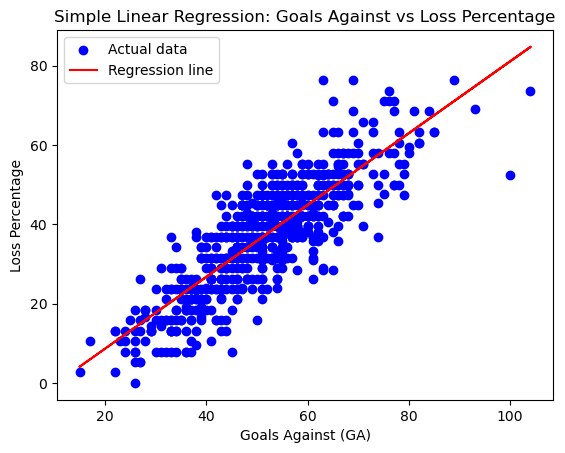

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
csv_file = r"PLTable.csv"
pl_data = pd.read_csv(csv_file)

# Create the independent variable (goals against)
X = pl_data['ga'].values  # Goals against

# Create the dependent variable (loss percentage)
y = (pl_data['lost'] / pl_data['played']) * 100  # Loss percentage

# Reshape X to a 2D array and add a bias term (column of ones) for the intercept
X = np.c_[np.ones(X.shape[0]), X]  # Add a column of ones for the intercept

# Calculate the coefficients using the Normal Equation: theta = (X'X)^(-1) * X' * y
theta = np.linalg.inv(X.T @ X) @ X.T @ y

# The intercept and slope (coefficient)
intercept = theta[0]
slope = theta[1]

print(f"Intercept: {intercept}")
print(f"Slope: {slope}")

# Make predictions using the regression model
y_pred = X @ theta

# Plot the regression line
plt.scatter(pl_data['ga'], y, color='blue', label='Actual data')  # Scatter plot of actual data
plt.plot(pl_data['ga'], y_pred, color='red', label='Regression line')  # Plot the regression line
plt.title('Simple Linear Regression: Goals Against vs Loss Percentage')
plt.xlabel('Goals Against (GA)')
plt.ylabel('Loss Percentage')
plt.legend()
plt.show()

   season_end_year            team  position  played  won  drawn  lost  gf  \
0             1993  Manchester Utd         1      42   24     12     6  67   
1             1993     Aston Villa         2      42   21     11    10  57   
2             1993    Norwich City         3      42   21      9    12  61   
3             1993       Blackburn         4      42   20     11    11  68   
4             1993             QPR         5      42   17     12    13  63   

   ga  gd  points                                 notes  
0  31  36      84  → Champions League via league finish  
1  40  17      74          → UEFA Cup via league finish  
2  65  -4      72        → UEFA Cup via league finish 1  
3  46  22      71                                   NaN  
4  55   8      63                                   NaN  


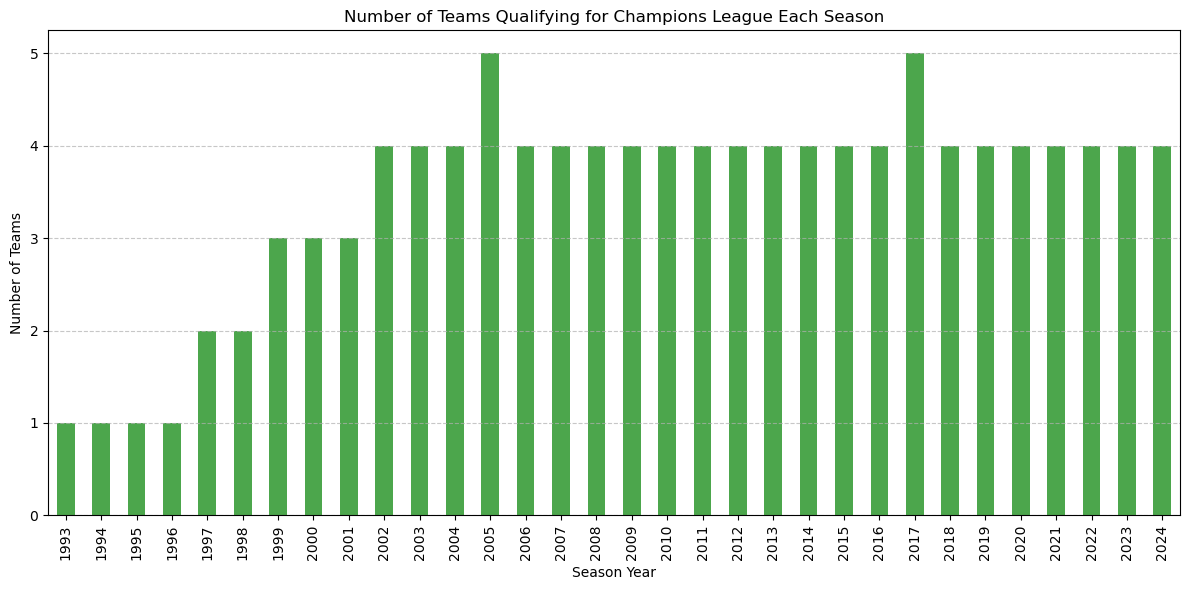

In [50]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Load the Premier League data
csv_file = r"PLTable.csv"
pl_data = pd.read_csv(csv_file)

# Display the first few rows to inspect the dataset
print(pl_data.head())

# Define a regex pattern to search for specific keywords in the 'notes' column (e.g., "Champions League")
champions_league_regex = r'Champions League'

# Apply regex to the 'notes' column to create a new column indicating if the team qualified for the Champions League
pl_data['champions_league'] = pl_data['notes'].apply(lambda x: bool(re.search(champions_league_regex, str(x))))

# Count the number of teams qualifying for the Champions League
champions_count = pl_data.groupby('season_end_year')['champions_league'].sum()

# Create a bar plot to visualize the number of teams qualifying for the Champions League each season
plt.figure(figsize=(12, 6))
champions_count.plot(kind='bar', color='green', alpha=0.7)
plt.title('Number of Teams Qualifying for Champions League Each Season')
plt.xlabel('Season Year')
plt.ylabel('Number of Teams')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

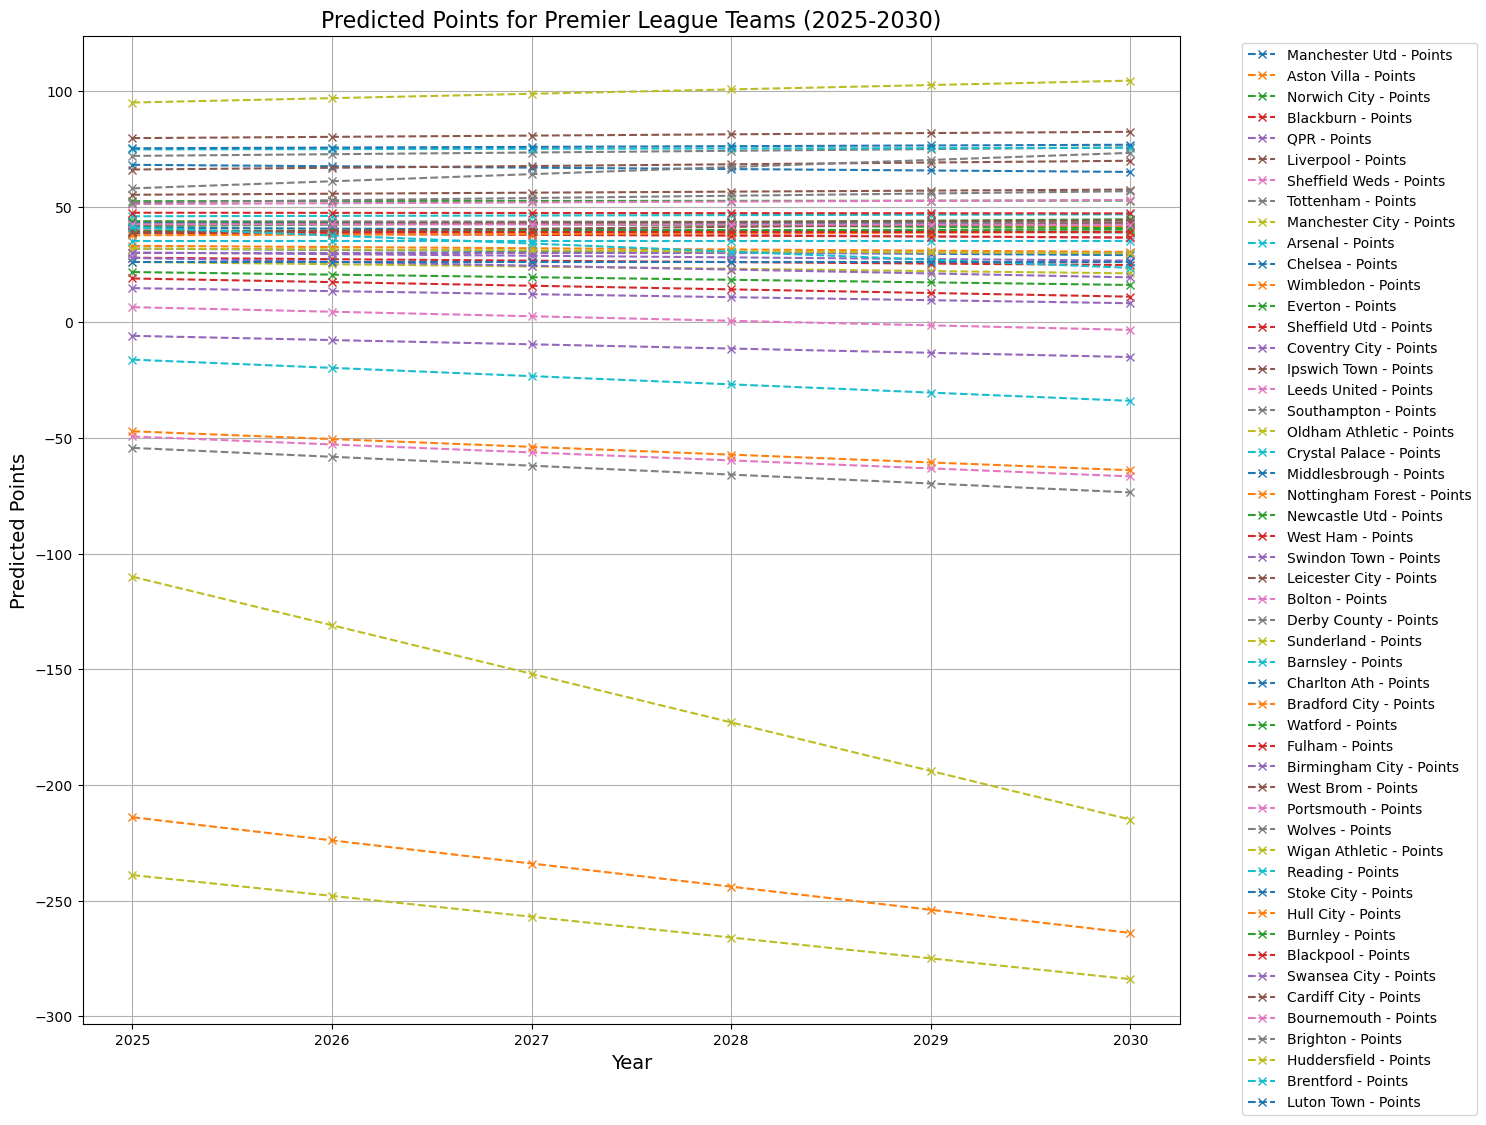


Predictions for Manchester Utd (2025-2030):
Year 2025: Points = 68.04
Year 2026: Points = 67.43
Year 2027: Points = 66.81
Year 2028: Points = 66.20
Year 2029: Points = 65.59
Year 2030: Points = 64.97

Predictions for Aston Villa (2025-2030):
Year 2025: Points = 43.47
Year 2026: Points = 43.03
Year 2027: Points = 42.58
Year 2028: Points = 42.14
Year 2029: Points = 41.69
Year 2030: Points = 41.24

Predictions for Norwich City (2025-2030):
Year 2025: Points = 21.69
Year 2026: Points = 20.57
Year 2027: Points = 19.45
Year 2028: Points = 18.34
Year 2029: Points = 17.22
Year 2030: Points = 16.11

Predictions for Blackburn (2025-2030):
Year 2025: Points = 18.90
Year 2026: Points = 17.33
Year 2027: Points = 15.76
Year 2028: Points = 14.19
Year 2029: Points = 12.62
Year 2030: Points = 11.05

Predictions for QPR (2025-2030):
Year 2025: Points = 14.73
Year 2026: Points = 13.43
Year 2027: Points = 12.13
Year 2028: Points = 10.82
Year 2029: Points = 9.52
Year 2030: Points = 8.21

Predictions for L

In [61]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv('PLTable.csv')

# Prepare data for each team prediction (points only)
teams = df['team'].unique()

# Initialize the plot
plt.figure(figsize=(15, 12))

# Loop over each team and predict points separately
for team in teams:
    team_data = df[df['team'] == team]

    # Prepare features and target for Linear Regression (season_end_year vs points)
    X = team_data[['season_end_year']]  # Independent variable (year)
    y_points = team_data['points']  # Target for points
    
    # Train the model for points prediction
    model_points = LinearRegression()
    model_points.fit(X, y_points)
    
    # Ensure the prediction data is in DataFrame format
    future_years = pd.DataFrame(np.array([i for i in range(2025, 2031)]), columns=['season_end_year'])
    
    # Predict points for future years
    predicted_points = model_points.predict(future_years)

    # Plot predicted points for the team
    plt.plot(future_years['season_end_year'], predicted_points, label=f'{team} - Points', linestyle='--', marker='x')

# Title and labels for the plot
plt.title('Predicted Points for Premier League Teams (2025-2030)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Predicted Points', fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.grid(True)
plt.show()

# Print predictions for each team
for team in teams:
    team_data = df[df['team'] == team]
    X = team_data[['season_end_year']]
    y_points = team_data['points']

    model_points = LinearRegression()
    model_points.fit(X, y_points)

    future_years = pd.DataFrame(np.array([i for i in range(2025, 2031)]), columns=['season_end_year'])

    predicted_points = model_points.predict(future_years)

    print(f"\nPredictions for {team} (2025-2030):")
    for year, points in zip(future_years['season_end_year'], predicted_points):
        print(f"Year {year}: Points = {points:.2f}")


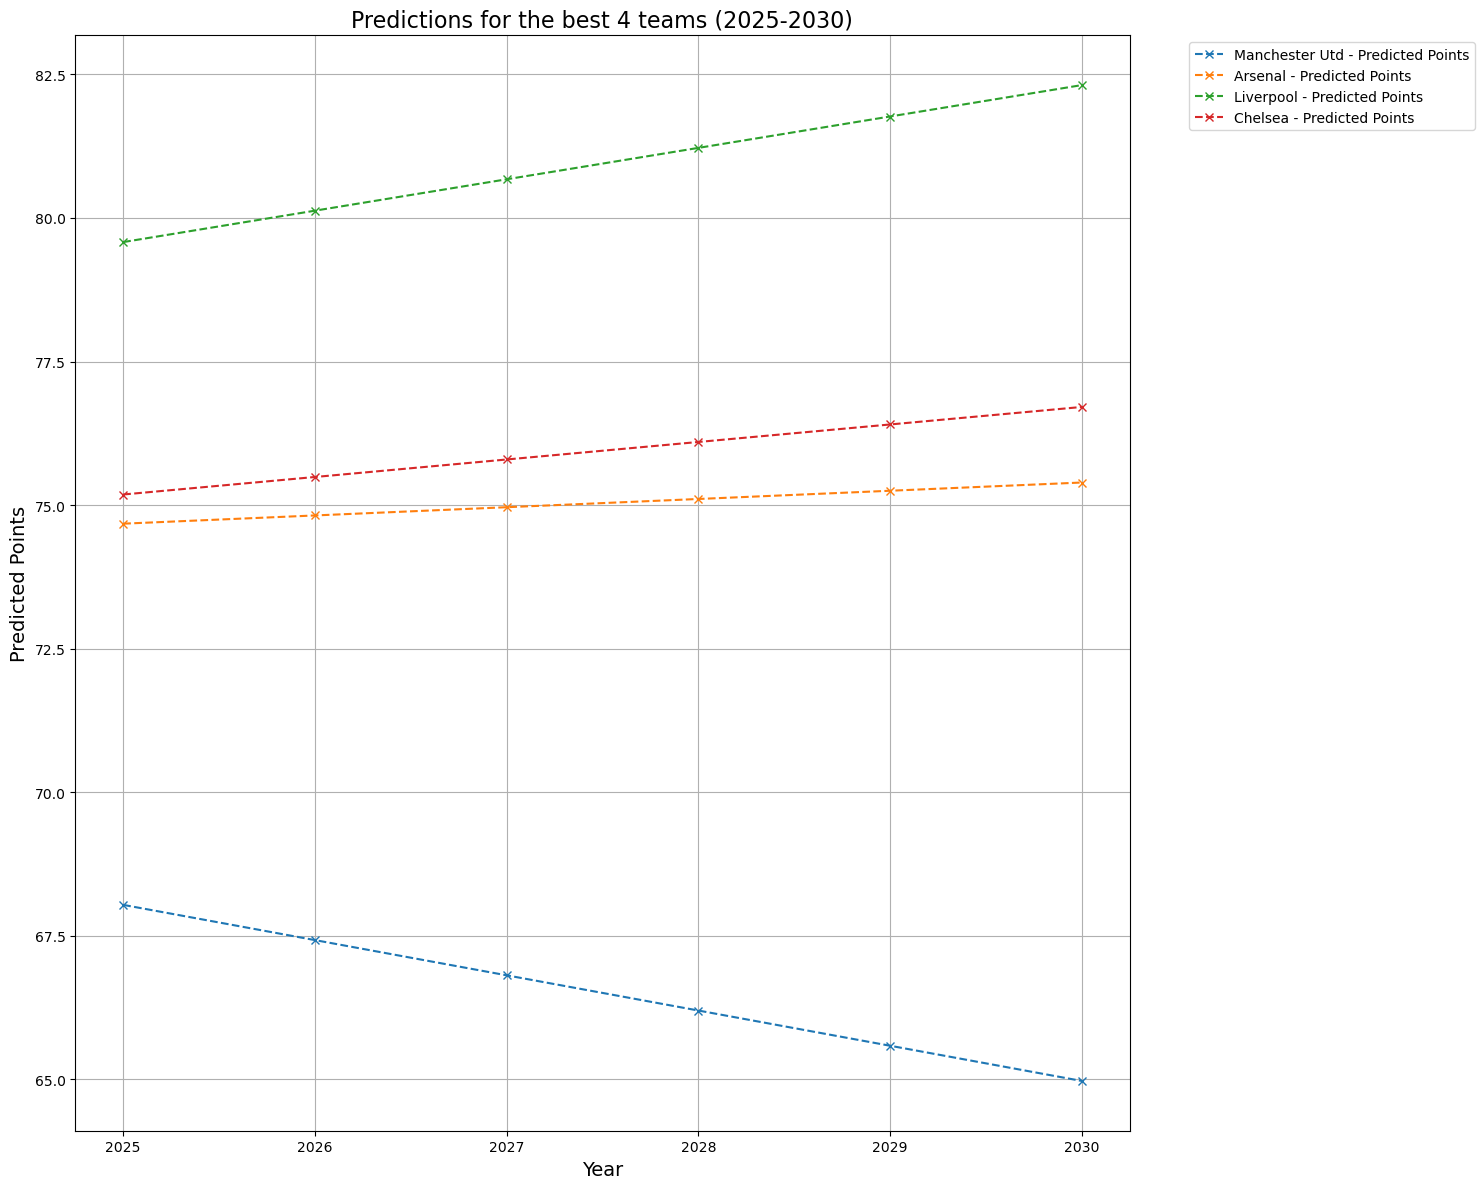


Predictions for Manchester Utd (2025-2030):
Year 2025: Points = 68.04
Year 2026: Points = 67.43
Year 2027: Points = 66.81
Year 2028: Points = 66.20
Year 2029: Points = 65.59
Year 2030: Points = 64.97

Predictions for Arsenal (2025-2030):
Year 2025: Points = 74.68
Year 2026: Points = 74.82
Year 2027: Points = 74.96
Year 2028: Points = 75.11
Year 2029: Points = 75.25
Year 2030: Points = 75.39

Predictions for Liverpool (2025-2030):
Year 2025: Points = 79.58
Year 2026: Points = 80.13
Year 2027: Points = 80.67
Year 2028: Points = 81.22
Year 2029: Points = 81.77
Year 2030: Points = 82.31

Predictions for Chelsea (2025-2030):
Year 2025: Points = 75.19
Year 2026: Points = 75.49
Year 2027: Points = 75.80
Year 2028: Points = 76.10
Year 2029: Points = 76.40
Year 2030: Points = 76.71


In [67]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv('PLTable.csv')

# Create win percentage column
df['win_percentage'] = (df['won'] / df['played']) * 100

# Calculate average points for each team over all years
team_avg_points = df.groupby('team')['points'].mean()

# Get the top 4 teams based on their average points
top_4_teams = team_avg_points.sort_values(ascending=False).head(4).index

# Initialize the plot
plt.figure(figsize=(15, 12))

# Loop over each top team and predict points separately
for team in top_4_teams:
    team_data = df[df['team'] == team]

    # Prepare features and target for Linear Regression (season_end_year vs points)
    X = team_data[['season_end_year']]  # Independent variable (year)
    y_points = team_data['points']  # Target for points
    
    # Train the model for points prediction
    model_points = LinearRegression()
    model_points.fit(X, y_points)
    
    # Predict future years (2025 to 2030) - Create DataFrame for proper feature names
    future_years = pd.DataFrame(np.array([i for i in range(2025, 2031)]), columns=['season_end_year'])
    
    # Predict points for future years
    predicted_points = model_points.predict(future_years)

    # Plot predicted points for the team
    plt.plot(future_years['season_end_year'], predicted_points, label=f'{team} - Predicted Points', linestyle='--', marker='x')

# Title and labels for the plot
plt.title('Predictions for the best 4 teams (2025-2030)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Predicted Points', fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.grid(True)
plt.show()

# Print predictions for each top 4 team
for team in top_4_teams:
    team_data = df[df['team'] == team]
    X = team_data[['season_end_year']]
    y_points = team_data['points']

    model_points = LinearRegression()
    model_points.fit(X, y_points)

    future_years = pd.DataFrame(np.array([i for i in range(2025, 2031)]), columns=['season_end_year'])

    predicted_points = model_points.predict(future_years)

    print(f"\nPredictions for {team} (2025-2030):")
    for year, points in zip(future_years['season_end_year'], predicted_points):
        print(f"Year {year}: Points = {points:.2f}")


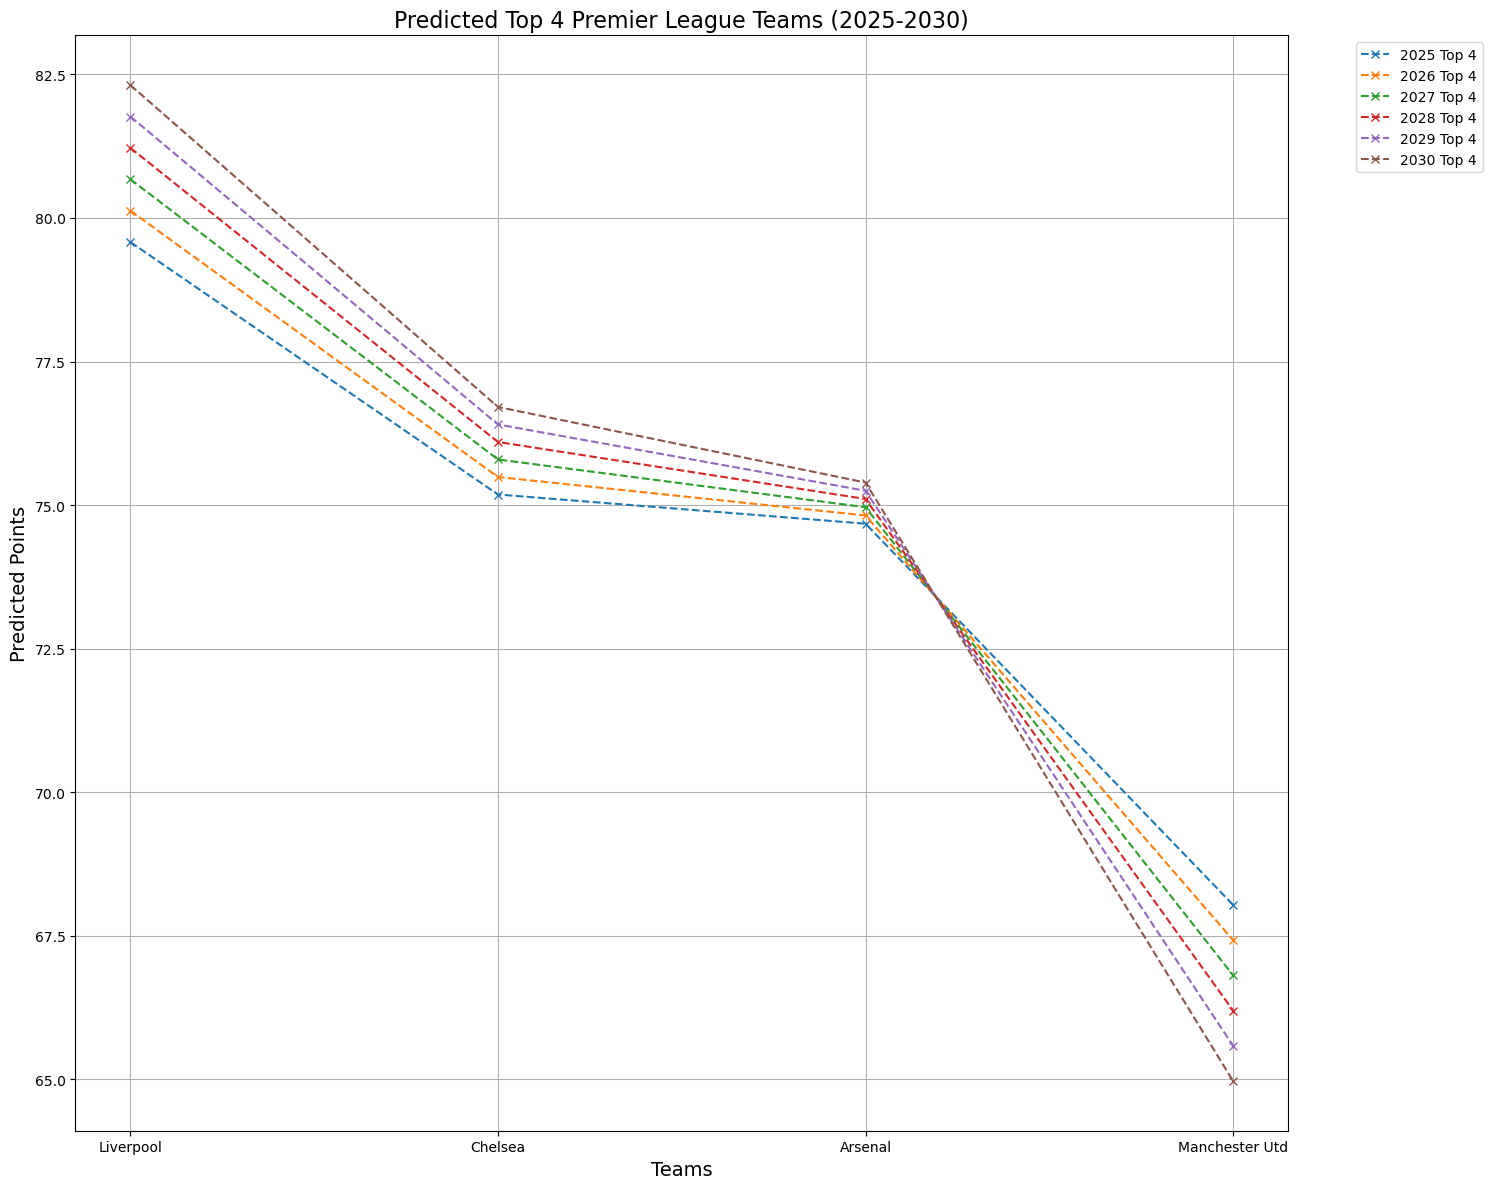


Top 4 Teams for 2025:
Rank 1: Liverpool - Predicted Points: 79.58
Rank 2: Chelsea - Predicted Points: 75.19
Rank 3: Arsenal - Predicted Points: 74.68
Rank 4: Manchester Utd - Predicted Points: 68.04

Top 4 Teams for 2026:
Rank 1: Liverpool - Predicted Points: 80.13
Rank 2: Chelsea - Predicted Points: 75.49
Rank 3: Arsenal - Predicted Points: 74.82
Rank 4: Manchester Utd - Predicted Points: 67.43

Top 4 Teams for 2027:
Rank 1: Liverpool - Predicted Points: 80.67
Rank 2: Chelsea - Predicted Points: 75.80
Rank 3: Arsenal - Predicted Points: 74.96
Rank 4: Manchester Utd - Predicted Points: 66.81

Top 4 Teams for 2028:
Rank 1: Liverpool - Predicted Points: 81.22
Rank 2: Chelsea - Predicted Points: 76.10
Rank 3: Arsenal - Predicted Points: 75.11
Rank 4: Manchester Utd - Predicted Points: 66.20

Top 4 Teams for 2029:
Rank 1: Liverpool - Predicted Points: 81.77
Rank 2: Chelsea - Predicted Points: 76.40
Rank 3: Arsenal - Predicted Points: 75.25
Rank 4: Manchester Utd - Predicted Points: 65.59


In [68]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv('PLTable.csv')

# Create win percentage column
df['win_percentage'] = (df['won'] / df['played']) * 100

# Calculate average points for each team over all years
team_avg_points = df.groupby('team')['points'].mean()

# Get the top 4 teams based on their average points
top_4_teams = team_avg_points.sort_values(ascending=False).head(4).index

# Initialize dictionary to store predictions for each team
team_predictions = {}

# Loop over each top team and predict points separately
for team in top_4_teams:
    team_data = df[df['team'] == team]

    # Prepare features and target for Linear Regression (season_end_year vs points)
    X = team_data[['season_end_year']]  # Independent variable (year)
    y_points = team_data['points']  # Target for points
    
    # Train the model for points prediction
    model_points = LinearRegression()
    model_points.fit(X, y_points)
    
    # Predict future years (2025 to 2030) - Create DataFrame for proper feature names
    future_years = pd.DataFrame(np.array([i for i in range(2025, 2031)]), columns=['season_end_year'])
    
    # Predict points for future years
    predicted_points = model_points.predict(future_years)
    
    # Store predictions for each team
    team_predictions[team] = predicted_points

# Create a DataFrame to hold all predictions for each year
predictions_df = pd.DataFrame(team_predictions, index=future_years['season_end_year'])

# Sort the teams for each year based on predicted points
predicted_top_4_df = predictions_df.apply(lambda x: x.sort_values(ascending=False).head(4), axis=1)

# Plot the top 4 teams' predicted points
plt.figure(figsize=(15, 12))

for year in range(2025, 2031):
    top_teams = predicted_top_4_df.loc[year]
    plt.plot(top_teams.index, top_teams.values, label=f'{year} Top 4', marker='x', linestyle='--')

plt.title('Predicted Top 4 Premier League Teams (2025-2030)', fontsize=16)
plt.xlabel('Teams', fontsize=14)
plt.ylabel('Predicted Points', fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.grid(True)
plt.show()

# Print predicted Top 4 teams for each year from 2025-2030
for year in range(2025, 2031):
    print(f"\nTop 4 Teams for {year}:")
    top_teams = predicted_top_4_df.loc[year]
    for rank, (team, points) in enumerate(zip(top_teams.index, top_teams.values), 1):
        print(f"Rank {rank}: {team} - Predicted Points: {points:.2f}")


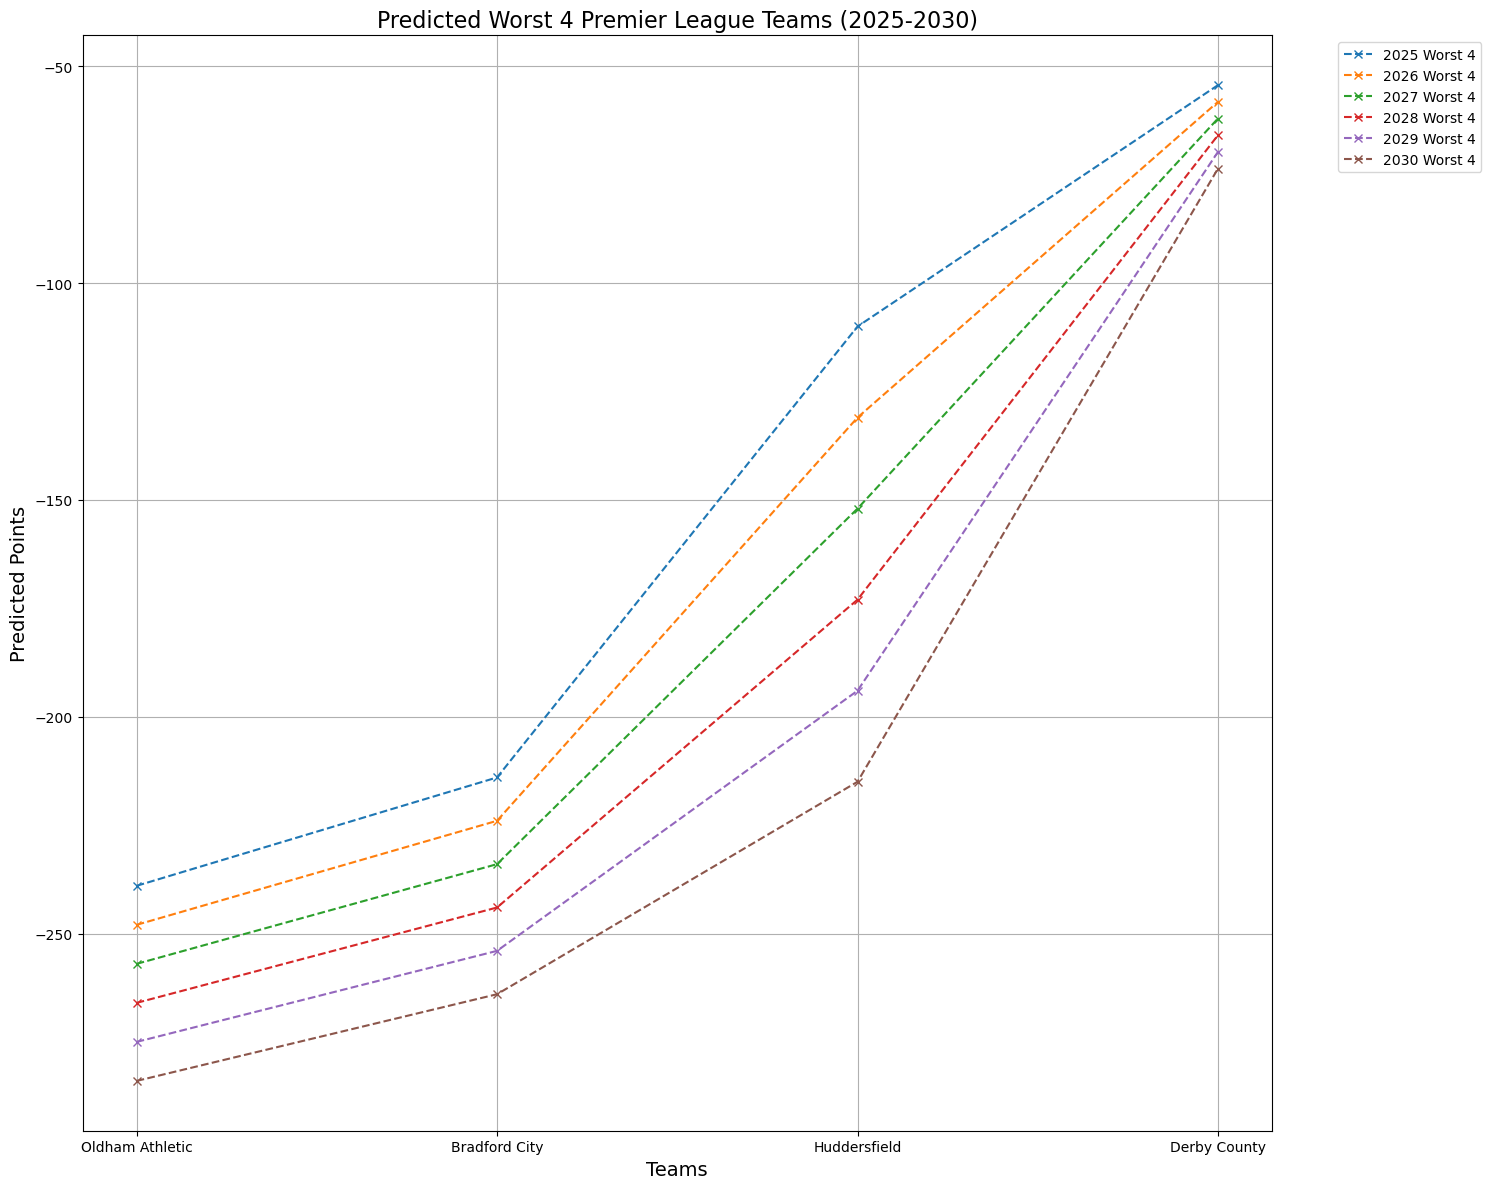


Worst 4 Teams for 2025:
Rank 1: Oldham Athletic - Predicted Points: -239.00
Rank 2: Bradford City - Predicted Points: -214.00
Rank 3: Huddersfield - Predicted Points: -110.00
Rank 4: Derby County - Predicted Points: -54.33

Worst 4 Teams for 2026:
Rank 1: Oldham Athletic - Predicted Points: -248.00
Rank 2: Bradford City - Predicted Points: -224.00
Rank 3: Huddersfield - Predicted Points: -131.00
Rank 4: Derby County - Predicted Points: -58.18

Worst 4 Teams for 2027:
Rank 1: Oldham Athletic - Predicted Points: -257.00
Rank 2: Bradford City - Predicted Points: -234.00
Rank 3: Huddersfield - Predicted Points: -152.00
Rank 4: Derby County - Predicted Points: -62.03

Worst 4 Teams for 2028:
Rank 1: Oldham Athletic - Predicted Points: -266.00
Rank 2: Bradford City - Predicted Points: -244.00
Rank 3: Huddersfield - Predicted Points: -173.00
Rank 4: Derby County - Predicted Points: -65.88

Worst 4 Teams for 2029:
Rank 1: Oldham Athletic - Predicted Points: -275.00
Rank 2: Bradford City - Pre

In [69]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv('PLTable.csv')

# Create win percentage column
df['win_percentage'] = (df['won'] / df['played']) * 100

# Calculate average points for each team over all years
team_avg_points = df.groupby('team')['points'].mean()

# Get all teams
teams = df['team'].unique()

# Initialize dictionary to store predictions for each team
team_predictions = {}

# Loop over each team and predict points separately
for team in teams:
    team_data = df[df['team'] == team]

    # Prepare features and target for Linear Regression (season_end_year vs points)
    X = team_data[['season_end_year']]  # Independent variable (year)
    y_points = team_data['points']  # Target for points
    
    # Train the model for points prediction
    model_points = LinearRegression()
    model_points.fit(X, y_points)
    
    # Predict future years (2025 to 2030) - Create DataFrame for proper feature names
    future_years = pd.DataFrame(np.array([i for i in range(2025, 2031)]), columns=['season_end_year'])
    
    # Predict points for future years
    predicted_points = model_points.predict(future_years)
    
    # Store predictions for each team
    team_predictions[team] = predicted_points

# Create a DataFrame to hold all predictions for each year
predictions_df = pd.DataFrame(team_predictions, index=future_years['season_end_year'])

# Sort the teams for each year based on predicted points (ascending order) to get the worst 4 teams
predicted_worst_4_df = predictions_df.apply(lambda x: x.sort_values(ascending=True).head(4), axis=1)

# Plot the worst 4 teams' predicted points
plt.figure(figsize=(15, 12))

for year in range(2025, 2031):
    worst_teams = predicted_worst_4_df.loc[year]
    plt.plot(worst_teams.index, worst_teams.values, label=f'{year} Worst 4', marker='x', linestyle='--')

plt.title('Predicted Worst 4 Premier League Teams (2025-2030)', fontsize=16)
plt.xlabel('Teams', fontsize=14)
plt.ylabel('Predicted Points', fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.grid(True)
plt.show()

# Print predicted Worst 4 teams for each year from 2025-2030
for year in range(2025, 2031):
    print(f"\nWorst 4 Teams for {year}:")
    worst_teams = predicted_worst_4_df.loc[year]
    for rank, (team, points) in enumerate(zip(worst_teams.index, worst_teams.values), 1):
        print(f"Rank {rank}: {team} - Predicted Points: {points:.2f}")


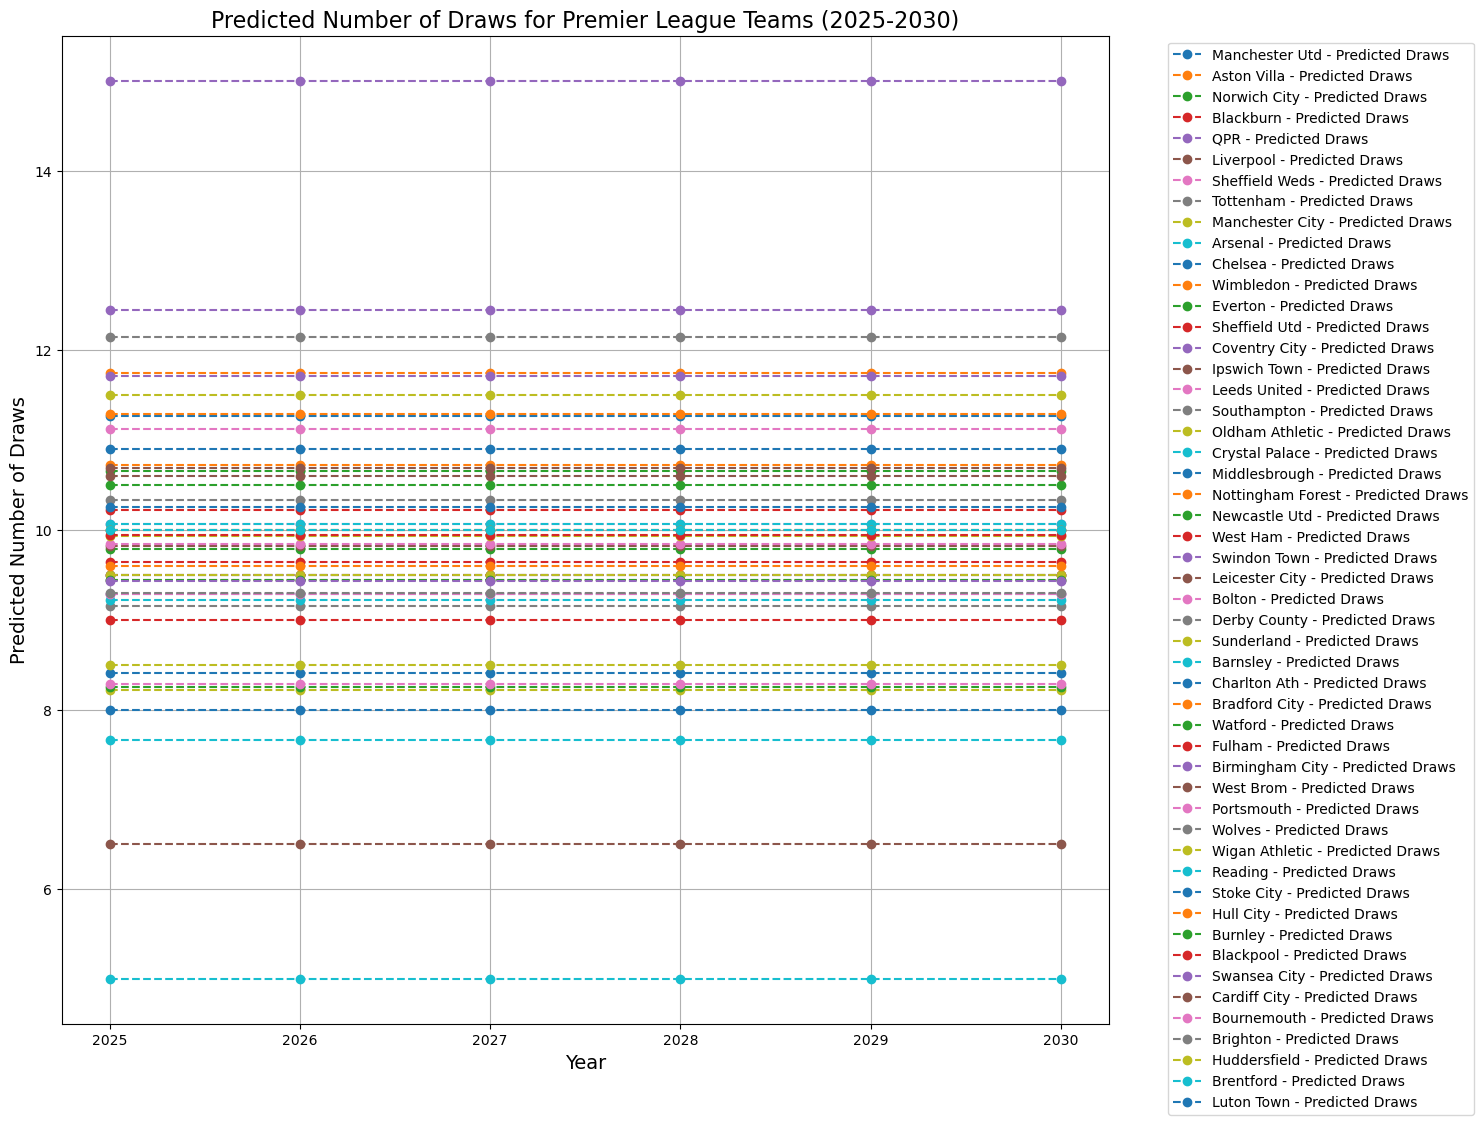


Predictions for Manchester Utd (2025-2030):
Year 2025: Predicted Draws = 8.41
Year 2026: Predicted Draws = 8.41
Year 2027: Predicted Draws = 8.41
Year 2028: Predicted Draws = 8.41
Year 2029: Predicted Draws = 8.41
Year 2030: Predicted Draws = 8.41

Predictions for Aston Villa (2025-2030):
Year 2025: Predicted Draws = 10.72
Year 2026: Predicted Draws = 10.72
Year 2027: Predicted Draws = 10.72
Year 2028: Predicted Draws = 10.72
Year 2029: Predicted Draws = 10.72
Year 2030: Predicted Draws = 10.72

Predictions for Norwich City (2025-2030):
Year 2025: Predicted Draws = 10.50
Year 2026: Predicted Draws = 10.50
Year 2027: Predicted Draws = 10.50
Year 2028: Predicted Draws = 10.50
Year 2029: Predicted Draws = 10.50
Year 2030: Predicted Draws = 10.50

Predictions for Blackburn (2025-2030):
Year 2025: Predicted Draws = 10.22
Year 2026: Predicted Draws = 10.22
Year 2027: Predicted Draws = 10.22
Year 2028: Predicted Draws = 10.22
Year 2029: Predicted Draws = 10.22
Year 2030: Predicted Draws = 10

In [83]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv('PLTable.csv')

# Calculate the number of draws for each match
df['draws'] = df['played'] - df['won'] - df['lost']

# Create a feature set for predicting draws
df['win_percentage'] = (df['won'] / df['played']) * 100

# List of teams (all unique teams in the dataset)
teams = df['team'].unique()

# Initialize the plot
plt.figure(figsize=(15, 12))

# Loop over each team to train and predict draws
for team in teams:
    # Filter data for the current team
    team_data = df[df['team'] == team]
    
    # Select features and target for prediction
    X = team_data[['gf', 'ga', 'win_percentage']]  # Features
    y = team_data['draws']  # Target: number of draws
    
    # Train the Linear Regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict the number of draws for the years 2025-2030
    future_years = np.array([i for i in range(2025, 2031)]).reshape(-1, 1)
    
    # Using the same feature names, calculate predicted draws for future years
    # Set the features as the mean of the features from the training data
    average_features = team_data[['gf', 'ga', 'win_percentage']].mean().values.reshape(1, -1)
    
    # Ensure the features are in the correct format (DataFrame)
    future_features = pd.DataFrame(np.tile(average_features, (6, 1)), columns=['gf', 'ga', 'win_percentage'])
    
    # Make sure the columns are aligned
    predicted_draws = model.predict(future_features)
    
    # Plot predicted draws for the team
    plt.plot(future_years, predicted_draws, label=f'{team} - Predicted Draws', linestyle='--', marker='o')

# Title and labels for the plot
plt.title('Predicted Number of Draws for Premier League Teams (2025-2030)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Predicted Number of Draws', fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.grid(True)
plt.show()

# Print predictions for each team
for team in teams:
    # Filter data for the current team
    team_data = df[df['team'] == team]
    
    # Select features and target for prediction
    X = team_data[['gf', 'ga', 'win_percentage']]
    y = team_data['draws']
    
    # Train the Linear Regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict the number of draws for the years 2025-2030
    future_years = np.array([i for i in range(2025, 2031)]).reshape(-1, 1)
    
    # Using the same feature names, calculate predicted draws for future years
    # Set the features as the mean of the features from the training data
    average_features = team_data[['gf', 'ga', 'win_percentage']].mean().values.reshape(1, -1)
    
    # Ensure the features are in the correct format (DataFrame)
    future_features = pd.DataFrame(np.tile(average_features, (6, 1)), columns=['gf', 'ga', 'win_percentage'])
    
    # Make sure the columns are aligned
    predicted_draws = model.predict(future_features)
    
    # Print predictions for the current team
    print(f"\nPredictions for {team} (2025-2030):")
    for year, draws in zip(future_years.flatten(), predicted_draws):
        print(f"Year {year}: Predicted Draws = {draws:.2f}")
